# 10. Pivot table

>  Pivot is used to transform or reshape dataframe into a different format. Pivot table is used to summarize and aggregate data inside dataframe. 

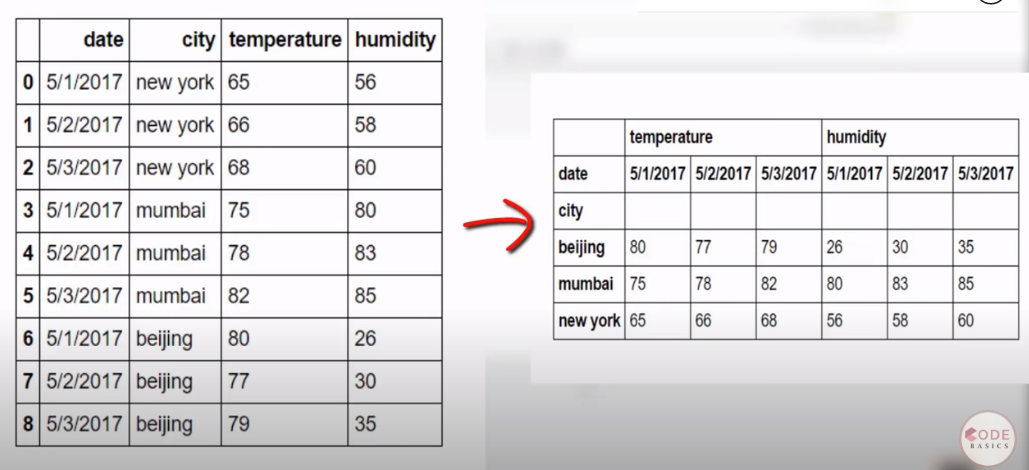

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/10_pivot/weather.csv')
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


In [4]:
df.pivot(index='date',columns='city',values=['temperature'])

temperature                
city         beijing mumbai new york
date                                
5/1/2017          80     75       65
5/2/2017          77     78       66
5/3/2017          79     82       68

In [8]:
df.pivot(index='date',columns='city')

temperature                 humidity                
city         beijing mumbai new york  beijing mumbai new york
date                                                         
5/1/2017          80     75       65       26     80       56
5/2/2017          77     78       66       30     83       58
5/3/2017          79     82       68       35     85       60

## What is a pivot table? 

Pivot table is used to summarize and aggregate the data inside

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/10_pivot/weather2.csv')
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/1/2017,new york,61,54
2,5/2/2017,new york,70,60
3,5/2/2017,new york,72,62
4,5/1/2017,mumbai,75,80
5,5/1/2017,mumbai,78,83
6,5/2/2017,mumbai,82,85
7,5/2/2017,mumbai,80,26


In [12]:
df.pivot_table(index='city',columns='date')

humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai       81.5     55.5        76.5     81.0
new york     55.0     61.0        63.0     71.0

## Use "aggfunc" argument in pivot_table() function 

In [13]:
df.pivot_table(index='city',columns='date',aggfunc='sum')

humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai        163      111         153      162
new york      110      122         126      142

In [14]:
df.pivot_table(index='city',columns='date',margins=True)

humidity                 temperature                 
date     5/1/2017 5/2/2017    All    5/1/2017 5/2/2017     All
city                                                          
mumbai      81.50    55.50  68.50       76.50     81.0  78.750
new york    55.00    61.00  58.00       63.00     71.0  67.000
All         68.25    58.25  63.25       69.75     76.0  72.875

## Use Grouper() function to aggregate

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/10_pivot/weather3.csv')
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,61,54
2,5/3/2017,new york,70,60
3,12/1/2017,new york,30,50
4,12/2/2017,new york,28,52
5,12/3/2017,new york,25,51


In [17]:
df['date'] = pd.to_datetime(df['date'])

In [18]:
df.pivot_table(index=pd.Grouper(freq='M',key='date'),columns='city')

,humidity,temperature
city,new york,new york
date,,
2017-05-31,56.666667,65.333333
2017-12-31,51.000000,27.666667
